In [12]:
import pandas as pd
import os 
import zipfile

In [14]:
!ls /home/dsc/Data/opentraveldata/

create_table_optd_aircraft.sql	  optd_airlines.csv
create_table_optd_airlines.sql	  optd_por_public.csv
create_table_optd_por_public.sql  optd_por_public_with_errors.csv
Finn.txt			  optd_por_public_with_errors_null2.csv
grep2				  optd_por_public_with_errors_null.csv
grepfile2			  optd_por_public_without_errors.csv
grepfile.gz			  ref_airline_nb_of_flights.csv
optd_aircraft.csv		  tmp


In [15]:
path_to_csvs = '/home/dsc/Data/opentraveldata/'

In [16]:
!ls {path_to_csvs}

create_table_optd_aircraft.sql	  optd_airlines.csv
create_table_optd_airlines.sql	  optd_por_public.csv
create_table_optd_por_public.sql  optd_por_public_with_errors.csv
Finn.txt			  optd_por_public_with_errors_null2.csv
grep2				  optd_por_public_with_errors_null.csv
grepfile2			  optd_por_public_without_errors.csv
grepfile.gz			  ref_airline_nb_of_flights.csv
optd_aircraft.csv		  tmp


In [17]:
path_vm = '/home/dsc/Data/opentraveldata'

In [18]:
csvs = !ls {path_to_csvs}

In [19]:
csvs

['create_table_optd_aircraft.sql',
 'create_table_optd_airlines.sql',
 'create_table_optd_por_public.sql',
 'Finn.txt',
 'grep2',
 'grepfile2',
 'grepfile.gz',
 'optd_aircraft.csv',
 'optd_airlines.csv',
 'optd_por_public.csv',
 'optd_por_public_with_errors.csv',
 'optd_por_public_with_errors_null2.csv',
 'optd_por_public_with_errors_null.csv',
 'optd_por_public_without_errors.csv',
 'ref_airline_nb_of_flights.csv',
 'tmp']

In [20]:
!head {path_to_csvs + '/' + csvs[0]}

CREATE TABLE optd_aircraft (
	iata_code VARCHAR(3) NOT NULL, 
	manufacturer VARCHAR(30), 
	model VARCHAR(45) NOT NULL, 
	iata_group VARCHAR(4), 
	iata_category VARCHAR(10), 
	icao_code VARCHAR(4), 
	nb_engines INTEGER, 
	aircraft_type VARCHAR(4)
);


In [21]:
path_to_aircraft = path_to_csvs + '/' + csvs[0]

In [22]:
df_ac = pd.read_csv(path_to_aircraft, sep='^')

In [23]:
df_ac.ix[5]

CREATE TABLE optd_aircraft (    \ticao_code VARCHAR(4), 
Name: 5, dtype: object

In [24]:
df_ac = pd.read_csv(path_to_aircraft, sep='^')

In [25]:
len(df_ac)

9

In [24]:
df_ac.to_excel('ac.xls')

In [26]:
!pwd

/home/dani/dev/master-data-science/07_pandas_for_data_science


In [27]:
import sqlite3

In [28]:
conn = sqlite3.connect('example.db')

In [29]:
df_ac.to_sql('aircraft', conn, if_exists='replace')

In [32]:
df_ac.to_json(orient='records')

'[{"iata_code":"100","manufacturer":"Fokker","model":"100","iata_group":"100","iata_category":"2J","icao_code":"F100","nb_engines":2.0,"aircraft_type":"J"},{"iata_code":"141","manufacturer":"BAe","model":"146-100","iata_group":"146","iata_category":"4J","icao_code":"B461","nb_engines":4.0,"aircraft_type":"J"},{"iata_code":"142","manufacturer":"BAe","model":"BAE Systems 146-200 Passenger","iata_group":"146","iata_category":"4J","icao_code":"B462","nb_engines":4.0,"aircraft_type":"J"},{"iata_code":"143","manufacturer":"BAe","model":"146-300","iata_group":"146","iata_category":"4J","icao_code":"B463","nb_engines":4.0,"aircraft_type":"J"},{"iata_code":"146","manufacturer":"BAe","model":"146","iata_group":null,"iata_category":null,"icao_code":null,"nb_engines":null,"aircraft_type":null},{"iata_code":"14F","manufacturer":"BAe","model":"146 Freighter (-100\\/200\\/300QT & QC)","iata_group":null,"iata_category":null,"icao_code":null,"nb_engines":null,"aircraft_type":null},{"iata_code":"14X","m

In [35]:
df2 = pd.read_excel('ac.xls')

In [37]:
df2.head()

,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines,aircraft_type
0,100,Fokker,100,100,2J,F100,2,J
1,141,BAe,146-100,146,4J,B461,4,J
2,142,BAe,BAE Systems 146-200 Passenger,146,4J,B462,4,J
3,143,BAe,146-300,146,4J,B463,4,J
4,146,BAe,146,NaN,NaN,NaN,NaN,NaN


In [39]:
df3 = pd.read_sql_query('SELECT * from aircraft', conn)

,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines,aircraft_type
0,100,Fokker,100,100,2J,F100,2,J
1,141,BAe,146-100,146,4J,B461,4,J
2,142,BAe,BAE Systems 146-200 Passenger,146,4J,B462,4,J
3,143,BAe,146-300,146,4J,B463,4,J
4,146,BAe,146,NaN,NaN,NaN,NaN,NaN


# Group by

In [44]:
df_ac.head()index_col

,iata_code,manufacturer,model,iata_group,iata_category,icao_code,nb_engines,aircraft_type
0,100,Fokker,100,100,2J,F100,2,J
1,141,BAe,146-100,146,4J,B461,4,J
2,142,BAe,BAE Systems 146-200 Passenger,146,4J,B462,4,J
3,143,BAe,146-300,146,4J,B463,4,J
4,146,BAe,146,NaN,NaN,NaN,NaN,NaN


In [48]:
gb = df_ac.groupby(df_ac['manufacturer'])

In [49]:
gb

In [50]:
gb['nb_engines']

In [51]:
gb['nb_engines'].mean()

manufacturer
ATR                               2.000000
Aerospatiale / SNIAS              2.000000
Agusta / AgustaWestland                NaN
AgustaWestland                    2.000000
Airbus                            2.413793
Aircraft Industries (LET)         2.000000
Airtech                           2.000000
Antonov                           3.200000
Antonow / Antonov                 2.444444
Ayres                                  NaN
BAC                               2.000000
BAe                               3.200000
Beechcraft                        1.875000
Bell Helicopter                        NaN
Boeing                            2.698630
Bombardier                        2.000000
Britten Norman                    2.500000
CASA                              2.000000
Canadair                          2.000000
Cessna                            1.857143
Comac                             2.000000
Convair                           2.000000
Curtiss                           2.00000

In [55]:
gb_2 = df_ac.groupby(['manufacturer','iata_group'])

In [56]:
gb_2

In [57]:
gb_2['nb_engines'].mean()

manufacturer               iata_group
ATR                        ATF           2.000000
                           ATR           2.000000
                           ATZ           2.000000
Aerospatiale / SNIAS       NDC           2.000000
Agusta / AgustaWestland    AGH                NaN
AgustaWestland             AWH           2.000000
Airbus                     310           2.000000
                           31F           2.000000
                           32F           2.000000
                           32S           2.000000
                           32X           2.000000
                           330           2.000000
                           33F           2.000000
                           340           4.000000
                           350           2.000000
                           380           4.000000
                           38F           4.000000
                           AB3           2.000000
                           ABF           2.000000
Aircraft Ind

In [60]:
type(gb_2['nb_engines'].count())

pandas.core.series.Series

### Iterating over groups

In [64]:
for name, group in df_ac.groupby('manufacturer'):
    print name
    print group[['nb_engines','icao_code']]

ATR
     nb_engines icao_code
173           2      AT43
174           2      AT45
175           2      AT72
176           2      AT44
177           2      AT72
179         NaN       NaN
180           2         *
Aerospatiale / SNIAS
     nb_engines icao_code
411           2      S601
435         NaN       NaN
Agusta / AgustaWestland
     nb_engines icao_code
159         NaN      A109
AgustaWestland
     nb_engines icao_code
181           2      A139
Airbus
     nb_engines icao_code
9           NaN       NaN
10          NaN       NaN
11            2      A310
12            2      A310
13            2      A318
14            2      A319
15          NaN       NaN
16          NaN       NaN
17            2      A310
18            2      A310
19            2      A320
20            2      A321
21            2      A320
22            2      A321
23          NaN       NaN
24          NaN       NaN
25            2      A320
26            2      A321
27          NaN       NaN
28            2    

In [67]:
for (mf, iata), group in df_ac.groupby(['manufacturer', 'iata_code']):
    print mf
    print iata
    print group[['nb_engines','icao_code']]

ATR
AT4
     nb_engines icao_code
173           2      AT43
ATR
AT5
     nb_engines icao_code
174           2      AT45
ATR
AT7
     nb_engines icao_code
175           2      AT72
ATR
ATD
     nb_engines icao_code
176           2      AT44
ATR
ATF
     nb_engines icao_code
177           2      AT72
ATR
ATR
     nb_engines icao_code
179         NaN       NaN
ATR
ATZ
     nb_engines icao_code
180           2         *
Aerospatiale / SNIAS
NDC
     nb_engines icao_code
411           2      S601
Aerospatiale / SNIAS
SSC
     nb_engines icao_code
435         NaN       NaN
Agusta / AgustaWestland
AGH
     nb_engines icao_code
159         NaN      A109
AgustaWestland
AWH
     nb_engines icao_code
181           2      A139
Airbus
19D
   nb_engines icao_code
9         NaN       NaN
Airbus
310
    nb_engines icao_code
10         NaN       NaN
Airbus
312
    nb_engines icao_code
11           2      A310
Airbus
313
    nb_engines icao_code
12           2      A310
Airbus
318
    nb_engines icao_co

In [69]:
gb.aggregate(['mean','std'])

nb_engines          
                                     mean       std
manufacturer                                       
ATR                              2.000000  0.000000
Aerospatiale / SNIAS             2.000000       NaN
Agusta / AgustaWestland               NaN       NaN
AgustaWestland                   2.000000       NaN
Airbus                           2.413793  0.824502
Aircraft Industries (LET)        2.000000       NaN
Airtech                          2.000000       NaN
Antonov                          3.200000  1.788854
Antonow / Antonov                2.444444  0.881917
Ayres                                 NaN       NaN
BAC                              2.000000  0.000000
BAe                              3.200000  1.014185
Beechcraft                       1.875000  0.353553
Bell Helicopter                       NaN       NaN
Boeing                           2.698630  0.908065
Bombardier                       2.000000  0.000000
Britten Norman                   2.500000  0.707107
CASA                             2.000000       NaN
Canadair                         2.000000  0.000000
Cessna                           1.857143  0.363137
Comac                            2.000000       NaN
Convair                          2.000000  0.000000
Curtiss                          2.000000       NaN
DAHER-SOCATA                     1.000000       NaN
Dassault                         2.500000  0.534522
De Havilland                     3.000000  1.414214
De Havilland Canada              1.666667  1.211060
De Havilland Canada-Bombardier   2.000000  0.000000
De Havilland-Bombardier               NaN       NaN
Diamond Aircraft                 2.000000       NaN
...                                   ...       ...
Helio                            1.000000       NaN
IAI                              2.000000       NaN
Ilyushin                         3.714286  0.755929
Junkers                          3.000000       NaN
LET                              2.000000       NaN
Learjet                          2.000000       NaN
Lockheed                         3.500000  0.547723
MBB                                   NaN       NaN
MD Helicopters                        NaN       NaN
McDonnell Douglas                2.470588  0.514496
Mil                                   NaN       NaN
Mitsubishi                       2.000000       NaN
NAMC                             2.000000       NaN
Nord / SNCAN                          NaN       NaN
Partenavia                       2.000000       NaN
Piaggio Aero                     2.000000       NaN
Pilatus                          1.000000  0.000000
Piper                            1.666667  0.577350
Rockwell                         2.000000  0.000000
Saab                             2.000000  0.000000
Shaanxi                          4.000000       NaN
Shorts                           2.000000  0.000000
Sikorsky                              NaN       NaN
Sud-Est                               NaN       NaN
Sukhoi                           2.000000  0.000000
Surface Equipment                     NaN       NaN
Tupolev                          2.200000  0.447214
Vickers                               NaN       NaN
Xian                             2.000000  0.000000
Yakovlev / Jakovlev              3.000000  0.000000

[75 rows x 2 columns]

## Plotting

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
%matplotlib inline

In [74]:
mu, sigma = 100, 15

x = mu + sigma * np.random.randn(10000)

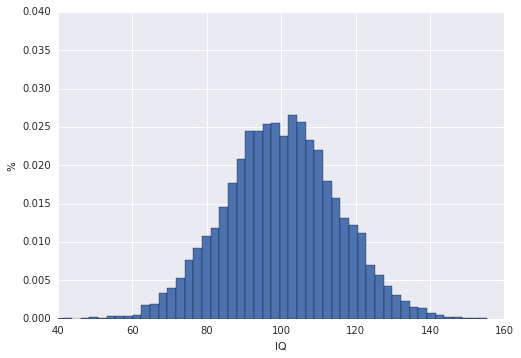

In [88]:
plt.hist(x, 50,normed =1)

plt.xlabel('IQ')
plt.ylabel('%')
plt.axis([40, 160, 0, 0.04])

plt.show()

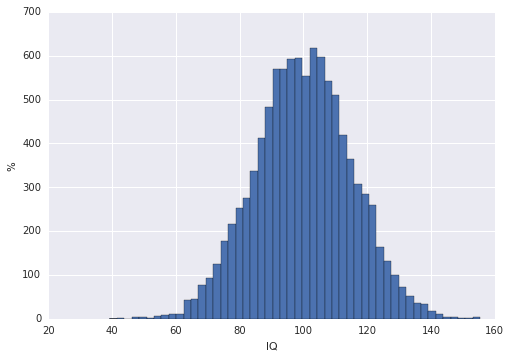

In [89]:
plt.hist(x, 50)

plt.xlabel('IQ')
plt.ylabel('%')
plt.show()

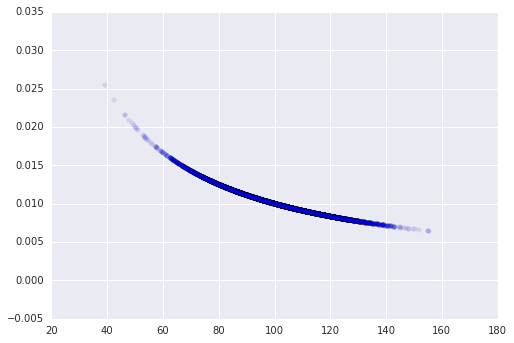

In [91]:
plt.scatter(x, 1/x, alpha=0.1)


In [93]:
import seaborn as sns

In [102]:
x = np.linspace(0,100, 10000)

In [103]:
y = np.exp(x)

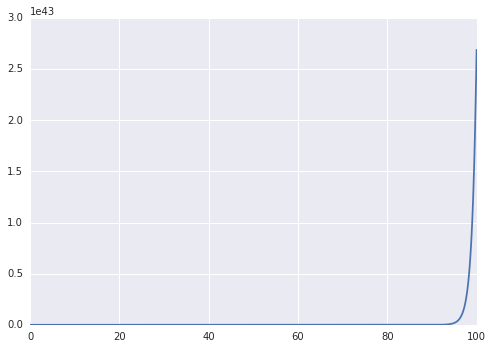

In [104]:
plt.plot(x,y)